<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/workbook_03_numpy_arrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Helper Functions

str_style = '''
<style>
table {
  border-collapse: collapse;
}

td {
  border: 3px solid #666666;
  min-width:30px;
  height: 30px;
  position: relative; 
  text-align:center; 
  color: #474747;
  font-size:20px;
  font-weight: bolder;
  padding: 19px;
}

.up{
  position: absolute; 
  right: 0;
  top: 0;
  background: white;
  text-align: right;
  font-size: 16px;
  font-family: Courier;
  font-weight: bolder;
  color: blue;
  opacity: 1.0;
  background-color:rgba(0, 0, 0, 0.0);
}

.down{
  position: absolute; 
  right: 0;
  bottom: 0;
  background: white;
  text-align: right;
  font-size: 16px;
  font-family: Courier;
  font-weight: bolder;
  color: red;
  opacity: 0.9;
  background-color:rgba(0, 0, 0, 0.0);
}
</style>
'''

#background-color:rgba(0, 0, 0, 0.0);

def enclose_element(element, idx_up, idx_down):
  return ('\t<td>' + str(element) + '<span class="up">' 
                   + str(idx_up)  + '</span><span class="down">' 
                   + str(idx_down) + '</span></td>')

def horizontal_tbl(array, color):
  result = '<table bgcolor="' + color + '"><tr>\n'
  max_count = len(array)
  for idx, e in enumerate(array):
    result += enclose_element(e, idx, idx - max_count) + '\n'
  result += '</tr></table>\n'
  return result

def vertical_tbl(array, color):
  result = '<table bgcolor="' + color + '">\n'
  max_count = len(array)
  for idx, e in enumerate(array):
    result += '<tr>' + enclose_element(e, idx, idx - max_count) + '</tr>\n'
  result += '</table>\n'
  return result

def recursive_tbl(array, parity, max_levels, level=0, color_A=[150,200,255], color_B=[75, 100, 170]):
  mix = np.array(color_A) * (level/max_levels) + np.array(color_B) * (1.0 - level/max_levels)
  color = "".join(["%02x" % int(c) for c in mix])
  if len(array.shape) == 1:
    return horizontal_tbl(array, color)
  if parity:
    return horizontal_tbl([recursive_tbl(x, not parity, max_levels, level+1, color_A, color_B) for x in array], color)
  else:
    return vertical_tbl([recursive_tbl(x, not parity, max_levels, level+1, color_A, color_B) for x in array], color)

def visualize_array(array):
  array_str = recursive_tbl(array, len(array.shape) % 2, len(array.shape)-1)
  import IPython
  from google.colab import output
  display(IPython.display.HTML(str_style + array_str))

In [0]:
import numpy as np

a = np.array([[[1,2,3,4],[5,6,7,8]], [[1,2,3,4],[5,6,7,8]]])
print("ORIGINAL ARRAY")
visualize_array(a)

b = a.reshape(2,2,2,2)
print("RESHAPED ARRAY")
visualize_array(b)

ORIGINAL ARRAY


10-4,21-3,32-2,43-1
50-4,61-3,72-2,83-1
10-4,21-3,32-2,43-1
50-4,61-3,72-2,83-1


RESHAPED ARRAY


10-2,21-1
30-2,41-1
50-2,61-1
70-2,81-1
10-2,21-1
30-2,41-1
50-2,61-1
70-2,81-1


In [0]:
# Explore the broadcasting

import numpy as np

x = np.array([[1,2,3]])
y = np.array([[4],[5]])
x_b, y_b = np.broadcast_arrays(x, y)

draw_tbl([[array_to_html(x),  array_to_html(y)],
          [{'text': 'broadcasting', 'colspan': 2}],
          [array_to_html(x_b), array_to_html(y_b)]])

#Beginner

##1. Import numpy as np and see the version

**Problem:**
Import numpy as “np” and print the version number.

In [0]:
# Enter your code here

###Solution:

In [0]:
import numpy as np
print(np.__version__)

##2. How to create a 1D array?


**Problem:**

Create a 1D array of numbers from 0 to 9

**Expected output:**
```
array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
```

In [0]:
import numpy as np

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Solution
np.arange(10)

##3. How to create a boolean array?

**Problem:**

Create a 3x3 numpy array of all True’s

**Expected output:**

```
array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])
```

In [0]:
import numpy as np

# Enter your code here

###Solution A:

In [0]:
import numpy as np

# Solution
np.full((3, 3), True, dtype=bool)

###Solution B:

In [0]:
import numpy as np

# Solution
np.ones((3,3), dtype=bool)

##4. How to extract items that satisfy a given condition from 1D array?

**Problem:**
Extract all odd numbers from numpy.array.

**Possible Input:**
```python
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
```

**Expected Output:**
```
array([1, 3, 5, 7, 9])
```

In [0]:
import numpy as np

# Input
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Solution
arr[arr % 2 == 1]

##5. How to replace items that satisfy a condition with another value in numpy array?

**Problem:**
Replace all odd numbers in numpy.array with -1

**Possible Input:**
```python
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
```

**Expected Output:**
```
array([ 0, -1,  2, -1,  4, -1,  6, -1,  8, -1])
```

In [0]:
import numpy as np

# Input
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Solution
arr[arr % 2 == 1] = -1
arr

##6. How to reshape an array?

**Problem:**
Convert a 1D array to a 2D array with 2 rows.

**Possible Input:**
```python
arr = np.arange(10)
```

**Expected Output:**
```
array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])
```

In [0]:
import numpy as np

# Input
arr = np.arange(10)

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
arr = np.arange(10)

# Solution
arr.reshape(2, -1) # Setting to -1 automatically decides the number of cols

##7. How to print only 3 decimal places in python numpy array?

**Problem:**
Print or show only 3 decimal places of the numpy array rand_arr.

**Possible Input:**
```python
rand_arr = np.array([[0.548814, 0.715189, 0.602763],
                     [0.544883, 0.423655, 0.645894],
                     [0.437587, 0.891773, 0.963663],
                     [0.383442, 0.791725, 0.528895],
                     [0.568045, 0.925597, 0.071036]])
```

**Expected Output:**
```
array([[0.549, 0.715, 0.603],
       [0.545, 0.424, 0.646],
       [0.438, 0.892, 0.964],
       [0.383, 0.792, 0.529],
       [0.568, 0.926, 0.071]])
```

In [0]:
import numpy as np

# Input
rand_arr = np.array([[0.548814, 0.715189, 0.602763],
                     [0.544883, 0.423655, 0.645894],
                     [0.437587, 0.891773, 0.963663],
                     [0.383442, 0.791725, 0.528895],
                     [0.568045, 0.925597, 0.071036]])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
rand_arr = np.array([[0.548814, 0.715189, 0.602763],
                     [0.544883, 0.423655, 0.645894],
                     [0.437587, 0.891773, 0.963663],
                     [0.383442, 0.791725, 0.528895],
                     [0.568045, 0.925597, 0.071036]])

# Solution
np.set_printoptions(precision=3)
rand_arr

##8. How to pretty print a numpy array by suppressing the scientific notation (like 1e10)?

**Problem:**
Pretty print rand_arr by suppressing the scientific notation (like 1e10)

**Possible Input:**
```python
rand_arr = np.array([[5.434e-04, 2.784e-04, 4.245e-04],
                     [8.448e-04, 4.719e-06, 1.216e-04],
                     [6.707e-04, 8.259e-04, 1.367e-04]])
```

**Expected Output:**
```
array([[0.000543, 0.000278, 0.000425],
       [0.000845, 0.000005, 0.000122],
       [0.000671, 0.000826, 0.000137]])
```

In [0]:
import numpy as np

# Input
rand_arr = np.array([[5.434e-04, 2.784e-04, 4.245e-04],
                     [8.448e-04, 4.719e-06, 1.216e-04],
                     [6.707e-04, 8.259e-04, 1.367e-04]])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
rand_arr = np.array([[5.434e-04, 2.784e-04, 4.245e-04],
                     [8.448e-04, 4.719e-06, 1.216e-04],
                     [6.707e-04, 8.259e-04, 1.367e-04]])

# Solution
np.set_printoptions(suppress=True, precision=6)
rand_arr

##9. How to limit the number of items printed in output of numpy array?

**Problem:**
Limit the number of items printed in python numpy array a to a maximum of 6 elements.

**Possible Input:**
```python
a = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
```

**Expected Output:**
```
array([ 0,  1,  2, ..., 12, 13, 14])
```

In [0]:
import numpy as np

# Input
a = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
a = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

# Solution
np.set_printoptions(threshold=6)
a

##10. How to print the full numpy array without truncating

**Problem:**
Print the full numpy array a without truncating.

**Possible Input:**
```python
a = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
```

**Expected Output:**
```
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
```

In [0]:
import numpy as np

# Input
a = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
a = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

# Solution
np.set_printoptions(threshold=np.inf)
a

##11. How to compute the mean, median, standard deviation of a numpy array?

**Problem:**
Find the mean, median, standard deviation of given 1D array.

**Possible input:**
```python
arr = np.array([1,2,3,4,5,6,7,8,9,10])
```

**Expected output:**
```
mean =  5.5 ; median =  5.5 ; deviation =  2.8722813232690143
```

In [0]:
import numpy as np

# Input
arr = np.array([1,2,3,4,5,6,7,8,9,10])

# Enter your code here

# Output
print("mean = ", mu, "; median = ", med, "; deviation = ", sd)

###Solution:

In [0]:
import numpy as np

# Input
arr = np.array([1,2,3,4,5,6,7,8,9,10])

# Solution
mu, med, sd = np.mean(arr), np.median(arr), np.std(arr)

# Output
print("mean = ", mu, "; median = ", med, "; deviation = ", sd)

##12. How to find the percentile scores of a numpy array?


**Problem:**
Find the 5th and 95th percentile of given array.

**Possible Input:**
```python
arr = np.array([1,2,3,4,5,6,7,8,9,10])
```

**Expected Output:**
```
array([1.45, 9.55])
```

In [0]:
import numpy as np

# Input
arr = np.array([1,2,3,4,5,6,7,8,9,10])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
arr = np.array([1,2,3,4,5,6,7,8,9,10])

# Solution
np.percentile(arr, q=[5, 95])

##13. How to find the most frequent value in a numpy array?




**Problem:**
Find the most frequent value in the given array.

**Possible Input:**
```python
arr = np.array([3, 4, 2, 1, 1, 1, 2, 3, 1, 3])
```
**Expected Output:**
```
1
```

In [0]:
import numpy as np

# Input:
arr = np.array([3, 4, 2, 1, 1, 1, 2, 3, 1, 3])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input:
arr = np.array([3, 4, 2, 1, 1, 1, 2, 3, 1, 3])

# Solution:
vals, counts = np.unique(arr, return_counts=True)
vals[np.argmax(counts)]

#Intermediate

##1. How to replace items that satisfy a condition without affecting the original array?

**Problem:**
Replace all odd numbers in arr with -1 without changing arr

**Possible Input:**
```python
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
```

**Expected Output:**
```
 arr =  [0 1 2 3 4 5 6 7 8 9] 
 out =  [ 0 -1  2 -1  4 -1  6 -1  8 -1]
```

In [0]:
import numpy as np

# Input
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Enter your code here

# Output
print(' arr = ', arr, '\n out = ', out)

###Solution:

In [0]:
import numpy as np

# Input
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Solution
out = np.where(arr % 2 == 1, -1, arr)

# Output
print(' arr = ', arr, '\n out = ', out)

##2. How to stack two arrays vertically?

**Problem:**
Stack arrays a and b vertically

**Possible Input:**
```python
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)
```

**Expected Output:**
```
array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])
```

In [0]:
import numpy as np

# Input
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)

# Enter your code here

###Solution A:

In [0]:
import numpy as np

# Input
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)

# Solution
np.concatenate([a, b], axis=0)

###Solution B:

In [0]:
import numpy as np

# Input
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)

# Solution
np.vstack([a, b])

###Solution C:

In [0]:
import numpy as np

# Input
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)

# Solution
np.r_[a, b]

##3. How to stack two arrays horizontally?

**Problem:**
Stack the arrays a and b horizontally.

**Possible Input:**
```python
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)
```

**Expected Output:**
```
array([[0, 1, 2, 3, 4, 1, 1, 1, 1, 1],
       [5, 6, 7, 8, 9, 1, 1, 1, 1, 1]])
```

In [0]:
import numpy as np

# Input
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)

# Enter your code here

###Solution A:

In [0]:
import numpy as np

# Input
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)

# Solution
np.concatenate([a, b], axis=1)

###Solution B:

In [0]:
import numpy as np

# Input
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)

# Solution
np.hstack([a, b])

###Solution C:

In [0]:
import numpy as np

# Input
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)

# Solution
np.c_[a, b]

##4. How to generate custom sequences in numpy without hardcoding?

**Problem:**
Create the following pattern without hardcoding. Use only numpy functions and the given array.


**Possible Input:**
```python
a = np.array([1,2,3])
```

**Expected Output:**
```
array([1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3])
```

In [0]:
import numpy as np

# Input
a = np.array([1,2,3])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
a = np.array([1,2,3])

# Solution
np.r_[np.repeat(a, 3), np.tile(a, 3)]

##5. How to get the common items between two python numpy arrays?

**Problem:**
Get the common items between a and b

**Possible Input:**
```python
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])
```

**Expected Output:**
```
array([2, 4])
```

In [0]:
import numpy as np

# Input
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])

#Solution
np.intersect1d(a,b)

##6. How to remove from one array those items that exist in another?

**Problem:**
From array a remove all items present in array b.

**Possible Input:**
```python
a = np.array([1,2,3,4,5])
b = np.array([5,6,7,8,9])
```

**Expected Output:**
```
array([1, 2, 3, 4])
```

In [0]:
import numpy as np

# Input
a = np.array([1,2,3,4,5])
b = np.array([5,6,7,8,9])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
a = np.array([1,2,3,4,5])
b = np.array([5,6,7,8,9])

# Solution
np.setdiff1d(a,b)

##7. How to get the positions where elements of two arrays match?

**Problem:**
Get the positions where elements of a and b match.

**Possible Input:**
```python
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])
```

**Expected Output:**
```
array([1, 3, 5, 7])
```

In [0]:
import numpy as np

# Input
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])

# Enter your code here

###Solution A:

In [0]:
import numpy as np

# Input
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])

# Solution
np.where(a == b)[0]

###Solution B:

In [0]:
import numpy as np

# Input
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])

# Solution
np.nonzero(a == b)[0]

##8. How to extract all numbers between a given range from a numpy array?

**Problem:**
Get all items between 5 and 10 from a.

**Possible Input:**
```python
a = np.array([2, 6, 1, 9, 10, 3, 27])
```

**Expected Output:**
```
array([ 6,  9, 10])
```

In [0]:
import numpy as np

# Input
a = np.array([2, 6, 1, 9, 10, 3, 27])

# Enter your code here

###Solution A:

In [0]:
import numpy as np

# Input
a = np.array([2, 6, 1, 9, 10, 3, 27])

# Solution
index = np.where((a >= 5) & (a <= 10))
a[index]

###Solution B:

In [0]:
import numpy as np

# Input
a = np.array([2, 6, 1, 9, 10, 3, 27])

# Solution
index = np.where(np.logical_and(a >= 5, a <= 10))
a[index]

###Solution C:

In [0]:
import numpy as np

# Input
a = np.array([2, 6, 1, 9, 10, 3, 27])

# Solution
a[(a >= 5) & (a <= 10)]

##9. How to make a python function that handles scalars to work on numpy arrays?

**Problem:**
Convert the function maxx that works on two scalars to work on two arrays.

**Possible Input:**
```python
import numpy as np

# Input
def maxx(x, y):
    """Get the maximum of two items"""
    if x >= y:
        return x
    else:
        return y

a = np.array([5, 7, 9, 8, 6, 4, 5])
b = np.array([6, 3, 4, 8, 9, 7, 1])
```

**Expected Output:**
```
array([6., 7., 9., 8., 9., 7., 5.])
```

In [0]:
import numpy as np

# Input
def maxx(x, y):
    """Get the maximum of two items"""
    if x >= y:
        return x
    else:
        return y

a = np.array([5, 7, 9, 8, 6, 4, 5])
b = np.array([6, 3, 4, 8, 9, 7, 1])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
def maxx(x, y):
    """Get the maximum of two items"""
    if x >= y:
        return x
    else:
        return y

a = np.array([5, 7, 9, 8, 6, 4, 5])
b = np.array([6, 3, 4, 8, 9, 7, 1])

# Solution      
pair_max = np.vectorize(maxx, otypes=[float])
pair_max(a, b)

##10. How to swap two columns in a 2d numpy array?

**Problem:**
Swap columns 1 and 2 in the numpy.array.

**Possible Input:**
```python
arr = np.array([[0, 1, 2],
                [3, 4, 5],
                [6, 7, 8]])
```

**Expected Output:**
```
array([[1, 0, 2],
       [4, 3, 5],
       [7, 6, 8]])
```

In [0]:
import numpy as np

# Input
arr = np.array([[0, 1, 2],
                [3, 4, 5],
                [6, 7, 8]])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
arr = np.array([[0, 1, 2],
                [3, 4, 5],
                [6, 7, 8]])

# Solution
arr[:, [1,0,2]]

array([[1, 0, 2],
       [4, 3, 5],
       [7, 6, 8]])

##11. How to swap two rows in a 2d numpy array?

**Problem:**
Swap rows 1 and 2 in the numpy array.

**Possible Input:**
```python
arr = np.array([[3, 4, 5],
                [0, 1, 2],
                [6, 7, 8]])
```

**Expected Output:**
```
array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])
```

In [0]:
import numpy as np

# Input
arr = np.array([[3, 4, 5],
                [0, 1, 2],
                [6, 7, 8]])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
arr = np.array([[3, 4, 5],
                [0, 1, 2],
                [6, 7, 8]])

# Solution
arr[[1,0,2], :]

##12. How to reverse the rows of a 2D array?

**Problem:**
Reverse the rows of a 2D array.

**Possible Input:**
```python
arr = np.array([[3, 4, 5],
                [0, 1, 2],
                [6, 7, 8]])
```

**Expected Output:**
```
array([[6, 7, 8],
       [0, 1, 2],
       [3, 4, 5]])
```

In [0]:
import numpy as np

# Input
arr = np.array([[3, 4, 5],
                [0, 1, 2],
                [6, 7, 8]])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
arr = np.array([[3, 4, 5],
                [0, 1, 2],
                [6, 7, 8]])

# Solution
arr[::-1]


##13. How to reverse the columns of a 2D array?

**Problem:**
Reverse the columns of a 2D array arr.

**Possible Input:**
```python
arr = np.array([[3, 4, 5],
                [0, 1, 2],
                [6, 7, 8]])
```

**Expected Output:**
```
array([[5, 4, 3],
       [2, 1, 0],
       [8, 7, 6]])
```

In [0]:
import numpy as np

# Input
arr = np.array([[3, 4, 5],
                [0, 1, 2],
                [6, 7, 8]])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
arr = np.array([[3, 4, 5],
                [0, 1, 2],
                [6, 7, 8]])

# Solution
arr[:, ::-1]

##14. How to create a 2D array containing random floats between 5 and 10?

**Problem:**
Create a 2D array of shape 5x3 to contain random decimal numbers between 5 and 10.

**No input expected**

**Expected Output:**
Helper function should print "[OK]"

In [0]:
import numpy as np

# helper function to check correctness
def check_array(arr):
  if arr.shape != (5,3):
    print("[ERROR] Wrong shape")
  elif not np.all((rand_arr <= 10.0) & (rand_arr >= 5.0)):
    print("[ERROR] Value outside specified interval")
  else:
    print("[OK]")
########

# Enter your code here

# Check your result
check_array(rand_arr)

###Solution A:

In [0]:
import numpy as np

# Solution
rand_arr = np.random.randint(low=5, high=10, size=(5,3)) + np.random.random((5,3))
rand_arr

###Solution B:

In [0]:
import numpy as np

# Solution
rand_arr = np.random.uniform(5,10, size=(5,3))
rand_arr

##15. How to import a dataset with numbers and texts keeping the text intact in python numpy?

**Problem:**
Import the iris dataset keeping the text intact.
Print first three rows.

**Possible Input:**
```python
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
```

**Expected Output:**
```
array([[b'5.1', b'3.5', b'1.4', b'0.2', b'Iris-setosa'],
       [b'4.9', b'3.0', b'1.4', b'0.2', b'Iris-setosa'],
       [b'4.7', b'3.2', b'1.3', b'0.2', b'Iris-setosa']], dtype=object)
```

In [0]:
import numpy as np

# Input
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Solution
iris = np.genfromtxt(url, delimiter=',', dtype='object')
iris[:3]

##16. How to extract a particular column from 2D array?

**Problem:**
Given 2D array extract one column with specified index.

**Possible Input:**
```python
arr = np.array([[1,2,3,4,5],
                [1,2,3,4,5],
                [1,2,3,4,5],
                [1,2,3,4,5]])
extract_column_idx = 4
```

**Expected Output**
```
array([5, 5, 5, 5])
```

In [0]:
import numpy as np

# Input:
arr = np.array([[1,2,3,4,5],
                [1,2,3,4,5],
                [1,2,3,4,5],
                [1,2,3,4,5]])
extract_column_idx = 4

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input:
arr = np.array([[1,2,3,4,5],
                [1,2,3,4,5],
                [1,2,3,4,5],
                [1,2,3,4,5]])
extract_column_idx = 4

# Solution:
extracted = arr[:, extract_column_idx]
extracted

##17. How to extract a particular column from 1D array of tuples?

**Problem:**
Given array of tuples extract column specified by given index.

**Possible Input:**
```python
arr = np.array([(1,2,3,4,5),
                (1,2,3,4,5),
                (1,2,3,4,5),
                (1,2,3,4,5)])
extract_column_idx = 4
```

**Expected Output**
```
array([5, 5, 5, 5])
```

In [0]:
import numpy as np

# Input:
arr = np.array([(1,2,3,4,5),
                (1,2,3,4,5),
                (1,2,3,4,5),
                (1,2,3,4,5)])
extract_column_idx = 4

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input:
arr = np.array([(1,2,3,4,5),
                (1,2,3,4,5),
                (1,2,3,4,5),
                (1,2,3,4,5)])
extract_column_idx = 4

# Solution:
extract = np.array([row[extract_column_idx] for row in arr])
extract

##18. How to convert a 1d array of tuples to a 2d numpy array?

**Problem:**
Convert array of tuples into 2D array.

**Possible Input:**
```python
import numpy as np

# Input:
arr = np.array([( 1, 2, 3, 4),
                ( 5, 6, 7, 8),
                ( 9,10,11,12),
                (13,14,15,16)])
```

**Expected Output:**
```
array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])
```

In [0]:
import numpy as np

# Input:
arr = np.array([( 1, 2, 3, 4),
                ( 5, 6, 7, 8),
                ( 9,10,11,12),
                (13,14,15,16)])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input:
arr = np.array([( 1, 2, 3, 4),
                ( 5, 6, 7, 8),
                ( 9,10,11,12),
                (13,14,15,16)])

# Solution:
np.array([row.tolist()[:4] for row in arr])

##19. How to normalize an array so the values range exactly between 0 and 1?

**Problem:**
Create a normalized form of given array -- new values should range exactly between 0 and 1 so that the former minimum corresponds to value 0 and the former maximum corresponds to 1.
Consider appropriate linear trnsformation.

**Possible Input:**
```python
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
```

**Expected Output:**
```
array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])
```

In [0]:
import numpy as np

# Input
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Enter your code here

###Solution A:

In [0]:
import numpy as np

# Input
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Solution
arr_max, arr_min = arr.max(), arr.min()
arr_norm = (arr - arr_min)/(arr_max - arr_min)
arr_norm

###Solution B:

In [0]:
import numpy as np

# Input
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Solution
arr_max, arr_min = arr.max(), arr.min()
arr_norm = (arr - arr_min)/arr.ptp()
arr_norm

##20. How to insert values at random positions in an array?

**Problem:**
Insert np.nan values at 5 random positions in given array.

**Possible Input:**
```python
np.random.seed(0)
matr = np.array([[1.,2.,3.,4.,5.],
                 [1.,2.,3.,4.,5.],
                 [1.,2.,3.,4.,5.],
                 [1.,2.,3.,4.,5.],
                 [1.,2.,3.,4.,5.]])
```

**Expected Output:**
```
[[ 1.  2.  3. nan  5.]
 [ 1.  2.  3.  4.  5.]
 [ 1.  2.  3.  4.  5.]
 [nan  2. nan  4. nan]
 [ 1. nan  3.  4.  5.]]
```

In [0]:
import numpy as np

# Input
np.random.seed(0)
matr = np.array([[1.,2.,3.,4.,5.],
                 [1.,2.,3.,4.,5.],
                 [1.,2.,3.,4.,5.],
                 [1.,2.,3.,4.,5.],
                 [1.,2.,3.,4.,5.]])

# Enter your code here

# Output
print(matr)

###Solution:

In [0]:
import numpy as np

# Input
np.random.seed(0)
matr = np.array([[1.,2.,3.,4.,5.],
                 [1.,2.,3.,4.,5.],
                 [1.,2.,3.,4.,5.],
                 [1.,2.,3.,4.,5.],
                 [1.,2.,3.,4.,5.]])

# Solution
matr[np.random.randint(5, size=5), np.random.randint(5, size=5)] = np.nan

# Output
print(matr)

##21. How to find the position of missing values in numpy array?

**Problem:**
Find the number and position of missing values in given 2D array.

**Possible Input:**
```python
matr = np.array([[1.,    2., 3.,    4., 5.],
                 [1.,    2., 3.,    4., 5.],
                 [1.,    2., np.nan,4., 5.],
                 [np.nan,2., 3.,    4., 5.],
                 [1.,    2., 3.,    4., 5.]])
```

**Expected Output:**
```
Number of missing values: 
 2
Position of missing values: 
 (array([2, 3]), array([2, 0]))
```

In [0]:
import numpy as np

# Input
matr = np.array([[1.,    2., 3.,    4., 5.],
                 [1.,    2., 3.,    4., 5.],
                 [1.,    2., np.nan,4., 5.],
                 [np.nan,2., 3.,    4., 5.],
                 [1.,    2., 3.,    4., 5.]])

# Enter your code here

# Output
print("Number of missing values: \n", n_mis)
print("Position of missing values: \n", idx_mis)

###Solution:

In [0]:
import numpy as np

# Input
matr = np.array([[1.,    2., 3.,    4., 5.],
                 [1.,    2., 3.,    4., 5.],
                 [1.,    2., np.nan,4., 5.],
                 [np.nan,2., 3.,    4., 5.],
                 [1.,    2., 3.,    4., 5.]])

# Solution
n_mis = np.isnan(matr[:, :]).sum()
idx_mis = np.where(np.isnan(matr[:, :]))

# Output
print("Number of missing values: \n", n_mis)
print("Position of missing values: \n", idx_mis)

##22. How to find the correlation between two columns of a numpy array?

**Problem:**
Find the correlation between 1st column (index 0) and 3rd column (index 2) of given 2D array.

**Possible Input:**
```python
matr = np.array([[0, 0, 0, 2, 2],
                 [0, 2, 1, 2, 2],
                 [2, 2, 1, 0, 0],
                 [0, 0, 2, 0, 1],
                 [1, 2, 2, 0, 0]])
```

**Expected Output:**
```
0.13363062095621225
```

**Note:**
*   Correlation coef indicates the degree of linear relationship between two numeric variables. It can range between -1 to +1.
*   Besides correlation, p-value is often used. The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a correlation at least as extreme as the one computed. The lower the p-value (<0.01), stronger is the significance of the relationship. But do not use as an indicator of the strength.

In [0]:
import numpy as np

# Input
matr = np.array([[0, 0, 0, 2, 2],
                 [0, 2, 1, 2, 2],
                 [2, 2, 1, 0, 0],
                 [0, 0, 2, 0, 1],
                 [1, 2, 2, 0, 0]])

# Enter your code here

###Solution A:

In [0]:
import numpy as np

# Input
matr = np.array([[0, 0, 0, 2, 2],
                 [0, 2, 1, 2, 2],
                 [2, 2, 1, 0, 0],
                 [0, 0, 2, 0, 1],
                 [1, 2, 2, 0, 0]])

# Solution
np.corrcoef(matr[:, 0], matr[:, 2])[0, 1]

###Solution B:

In [0]:
import numpy as np

# Input
matr = np.array([[0, 0, 0, 2, 2],
                 [0, 2, 1, 2, 2],
                 [2, 2, 1, 0, 0],
                 [0, 0, 2, 0, 1],
                 [1, 2, 2, 0, 0]])

# Solution
from scipy.stats.stats import pearsonr 
corr, p_value = pearsonr(matr[:, 0], matr[:, 2])
print(corr)

##23. How to find if a given array has any null values?



**Problem:**
Find out if given array has any missing values (i.e. np.nan are present).

**Possible Input:**
```python
matr = np.array([[1.,    2., 3.,    4., 5.],
                 [1.,    2., 3.,    4., 5.],
                 [1.,    2., np.nan,4., 5.],
                 [np.nan,2., 3.,    4., 5.],
                 [1.,    2., 3.,    4., 5.]])
```

**Expected Output:**
```
True
```

In [0]:
import numpy as np

# Input
matr = np.array([[1.,    2., 3.,    4., 5.],
                 [1.,    2., 3.,    4., 5.],
                 [1.,    2., np.nan,4., 5.],
                 [np.nan,2., 3.,    4., 5.],
                 [1.,    2., 3.,    4., 5.]])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
matr = np.array([[1.,    2., 3.,    4., 5.],
                 [1.,    2., 3.,    4., 5.],
                 [1.,    2., np.nan,4., 5.],
                 [np.nan,2., 3.,    4., 5.],
                 [1.,    2., 3.,    4., 5.]])

# Solution
np.isnan(matr).any()

##24. How to replace all missing values with 0 in a numpy array?

**Problem:**
Replace all occurrences of np.nan with 0 in 2D array

**Possible Input:**
```python
matr = np.array([[1.,    2., 3.,    4., 5.],
                 [1.,    2., 3.,    4., 5.],
                 [1.,    2., np.nan,4., 5.],
                 [np.nan,2., 3.,    4., 5.],
                 [1.,    2., 3.,    4., 5.]])
```

**Expected Output:**
```
array([[1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.],
       [1., 2., 0., 4., 5.],
       [0., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.]])
```

In [0]:
import numpy as np

# Input
matr = np.array([[1.,    2., 3.,    4., 5.],
                 [1.,    2., 3.,    4., 5.],
                 [1.,    2., np.nan,4., 5.],
                 [np.nan,2., 3.,    4., 5.],
                 [1.,    2., 3.,    4., 5.]])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
matr = np.array([[1.,    2., 3.,    4., 5.],
                 [1.,    2., 3.,    4., 5.],
                 [1.,    2., np.nan,4., 5.],
                 [np.nan,2., 3.,    4., 5.],
                 [1.,    2., 3.,    4., 5.]])

# Solution
matr[np.isnan(matr)] = 0
matr[:,:]

##25. How to find the count of unique values in a numpy array?

**Problem:**
Find the unique values and the count of unique values in given array.

**Possible Input:**
```python
arr = np.array([1,2,3,1,2,4])
```

**Expected Output:**
```
(array([1, 2, 3, 4]), array([2, 2, 1, 1]))
```

In [0]:
import numpy as np

# Input 
arr = np.array([1,2,3,1,2,4])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input 
arr = np.array([1,2,3,1,2,4])

# Solution
np.unique(arr, return_counts=True)

##26. How to convert a numeric to a categorical (text) array?

**Problem:**
Bin the persons' height (given as 1D array) with respect to given bins (1D array) and print their text description (given as 1D array).

Height, m| Description
------------ | -------------
0.0 < h <= 1.7 | short
1.7 < h <= 1.85 | medium
1.85 < h <= 20 | tall
otherwise | alien


**Possible Input:**
```python
height_arr = np.array([1.80, 2.10, 1.90, 1.60, 1.70, 1.65, 1.75])
bins = [0.0, 1.7, 1.85, 2.0]
label_map = ['short', 'medium', 'tall', 'alien']
```

**Expected Output:**
```
['medium', 'alien', 'tall', 'short', 'medium', 'short', 'medium']
```

In [0]:
import numpy as np

# Input
height_arr = np.array([1.80, 2.10, 1.90, 1.60, 1.70, 1.65, 1.75])
bins = [0.0, 1.7, 1.85, 2.0]
label_map = ['short', 'medium', 'tall', 'alien']

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
height_arr = np.array([1.80, 2.10, 1.90, 1.60, 1.70, 1.65, 1.75])
bins = [0.0, 1.7, 1.85, 2.0]
label_map = ['short', 'medium', 'tall', 'alien']

# Solution
height_bin = np.digitize(height_arr, bins)
[label_map[x-1] for x in height_bin]

##27. How to create a new column from existing columns of a numpy array?



**Problem:**
An array that contains width, length, and height of parallelepipedal bars is given.
Add one more column to the array that should contain volume of the appropriate bar.

**Possible Input:**
```python
arr = np.array([[5.7, 4.3, 9.8],
                [1.0, 2.0, 1.6],
                [6.5, 2.5, 4.6],
                [2.4, 1.5, 1.1],
                [6.5, 1.3, 1.9],
                [3.6, 8.2, 0.9],
                [8.3, 0.9, 9.7],
                [4.6, 9.7, 6.0],
                [7.3, 0.3, 2.8],
                [1.2, 2.9, 1.1]])
```

**Expected Output:**
```
array([[  5.7  ,   4.3  ,   9.8  , 240.198],
       [  1.   ,   2.   ,   1.6  ,   3.2  ],
       [  6.5  ,   2.5  ,   4.6  ,  74.75 ],
       [  2.4  ,   1.5  ,   1.1  ,   3.96 ],
       [  6.5  ,   1.3  ,   1.9  ,  16.055],
       [  3.6  ,   8.2  ,   0.9  ,  26.568],
       [  8.3  ,   0.9  ,   9.7  ,  72.459],
       [  4.6  ,   9.7  ,   6.   , 267.72 ],
       [  7.3  ,   0.3  ,   2.8  ,   6.132],
       [  1.2  ,   2.9  ,   1.1  ,   3.828]])
```

In [0]:
import numpy as np

# Input
arr = np.array([[5.7, 4.3, 9.8],
                [1.0, 2.0, 1.6],
                [6.5, 2.5, 4.6],
                [2.4, 1.5, 1.1],
                [6.5, 1.3, 1.9],
                [3.6, 8.2, 0.9],
                [8.3, 0.9, 9.7],
                [4.6, 9.7, 6.0],
                [7.3, 0.3, 2.8],
                [1.2, 2.9, 1.1]])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
arr = np.array([[5.7, 4.3, 9.8],
                [1.0, 2.0, 1.6],
                [6.5, 2.5, 4.6],
                [2.4, 1.5, 1.1],
                [6.5, 1.3, 1.9],
                [3.6, 8.2, 0.9],
                [8.3, 0.9, 9.7],
                [4.6, 9.7, 6.0],
                [7.3, 0.3, 2.8],
                [1.2, 2.9, 1.1]])

# Solution
volume = arr[:, 0] * arr[:, 1] * arr[:, 2]
np.hstack([arr, volume[:, np.newaxis]])

##28. How to get the second largest value of an array when grouped by another array?

**Problem:**
An array that contains student's name and number of solved problems is given.
Find the second largest number of problems that Alice has solved.

**Possible Input:**
```python
arr = np.array([['Alice', 7], 
                ['Bob', 1], 
                ['Alice', 3], 
                ['Alice', 2], 
                ['Alice', 5], 
                ['Bob', 9], 
                ['Bob', 1], 
                ['Alice', 6],
                ['Bob', 6], 
                ['Alice', 3],
                ['Alice', 1]
               ])
student = 'Alice'
```

**Expected Output:**
```
6.0
```

In [0]:
import numpy as np

# Input
arr = np.array([['Alice', 7], 
                ['Bob', 1], 
                ['Alice', 3], 
                ['Alice', 2], 
                ['Alice', 5], 
                ['Bob', 9], 
                ['Bob', 1], 
                ['Alice', 6],
                ['Bob', 6], 
                ['Alice', 3],
                ['Alice', 1]
               ])
student = 'Alice'

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
arr = np.array([['Alice', 7], 
                ['Bob', 1], 
                ['Alice', 3], 
                ['Alice', 2], 
                ['Alice', 5], 
                ['Bob', 9], 
                ['Bob', 1], 
                ['Alice', 6],
                ['Bob', 6], 
                ['Alice', 3],
                ['Alice', 1]
               ])
student = 'Alice'

# Solution
filtered = arr[arr[:, 0] == student, [1]].astype('float')
np.unique(np.sort(filtered))[-2]

##29. How to sort a 2D array by a column?

**Problem:**
Sort the given dataset that contains student's name, course, and grade with respect to student's name.

**Possible Input:**
```python
arr = np.array([['John',   'English', 4],
                ['Paul',   'English', 5],
                ['Ringo',  'English', 4],
                ['George', 'English', 4],
                ['John',   'Math', 3],
                ['Paul',   'Math', 4],
                ['Ringo',  'Math', 4],
                ['George', 'Math', 4],
                ['John',   'Music', 5],
                ['Paul',   'Music', 5],
                ['Ringo',  'Music', 5],
                ['George', 'Music', 5]
               ])
sort_column_idx = 0
```

**Expected Outut:**
```
array([['George', 'English', '4'],
       ['George', 'Math', '4'],
       ['George', 'Music', '5'],
       ['John', 'English', '4'],
       ['John', 'Math', '3'],
       ['John', 'Music', '5'],
       ['Paul', 'English', '5'],
       ['Paul', 'Math', '4'],
       ['Paul', 'Music', '5'],
       ['Ringo', 'English', '4'],
       ['Ringo', 'Math', '4'],
       ['Ringo', 'Music', '5']], dtype='<U7')
```

In [0]:
import numpy as np

# Input:
arr = np.array([['John',   'English', 4],
                ['Paul',   'English', 5],
                ['Ringo',  'English', 4],
                ['George', 'English', 4],
                ['John',   'Math', 3],
                ['Paul',   'Math', 4],
                ['Ringo',  'Math', 4],
                ['George', 'Math', 4],
                ['John',   'Music', 5],
                ['Paul',   'Music', 5],
                ['Ringo',  'Music', 5],
                ['George', 'Music', 5]
               ])
sort_column_idx = 0

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input:
arr = np.array([['John',   'English', 4],
                ['Paul',   'English', 5],
                ['Ringo',  'English', 4],
                ['George', 'English', 4],
                ['John',   'Math', 3],
                ['Paul',   'Math', 4],
                ['Ringo',  'Math', 4],
                ['George', 'Math', 4],
                ['John',   'Music', 5],
                ['Paul',   'Music', 5],
                ['Ringo',  'Music', 5],
                ['George', 'Music', 5]
               ])
sort_column_idx = 0

# Solution:
arr[arr[:,sort_column_idx].argsort()]

##30. How to find the position of the first occurrence of a value greater than a given value?

**Problem:**
Find the position of the first occurrence of a value strictly greater than given threshold.

**Possible Input:**
```python
arr = np.array([8, 5, 2, 7, 5, 9, 0, 9, 8, 6, 2, 0, 5, 3, 10, 2, 3, 6, 4, 1])
threshold = 8
```

**Expected Output:**
```
5
```

In [0]:
import numpy as np

# Input:
arr = np.array([8, 5, 2, 7, 5, 9, 0, 9, 8, 6, 2, 0, 5, 3, 10, 2, 3, 6, 4, 1])
threshold = 8

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input:
arr = np.array([8, 5, 2, 7, 5, 9, 0, 9, 8, 6, 2, 0, 5, 3, 10, 2, 3, 6, 4, 1])
threshold = 8

# Solution:
np.argwhere(arr > threshold)[0,0]

##31. How to replace all values greater than a given value to a given cutoff?

**Problem:**
An array together with two numbers *min* and *max* are given.
Replace all values in array less than *min* with *min* and all values greater than *max* with *max*.
Suppose that *max* is always greater than *min*.

**Possible Input:**
```python
import numpy as np

# Input
a = np.array([27.63, 14.64, 21.8, 42.39,  1.23,
               6.96, 33.87, 41.47,  7.7,  29.18,
              44.67, 11.25, 10.08,  6.31, 11.77, 
              48.95, 40.77,  9.43, 41.  , 14.43])
```

**Expected Output:**
```
array([27.63, 14.64, 21.8 , 30.  , 10.  , 10.  , 30.  , 30.  , 10.  ,
       29.18, 30.  , 11.25, 10.08, 10.  , 11.77, 30.  , 30.  , 10.  ,
       30.  , 14.43])
```

In [0]:
import numpy as np

# Input
a = np.array([27.63, 14.64, 21.8, 42.39,  1.23,
               6.96, 33.87, 41.47,  7.7,  29.18,
              44.67, 11.25, 10.08,  6.31, 11.77, 
              48.95, 40.77,  9.43, 41.  , 14.43])

# Enter your code here

###Solution A:

In [0]:
import numpy as np

# Input
a = np.array([27.63, 14.64, 21.8, 42.39,  1.23,
               6.96, 33.87, 41.47,  7.7,  29.18,
              44.67, 11.25, 10.08,  6.31, 11.77, 
              48.95, 40.77,  9.43, 41.  , 14.43])

# Solution
np.clip(a, a_min=10, a_max=30)

###Solution B:

In [0]:
import numpy as np

# Input
a = np.array([27.63, 14.64, 21.8, 42.39,  1.23,
               6.96, 33.87, 41.47,  7.7,  29.18,
              44.67, 11.25, 10.08,  6.31, 11.77, 
              48.95, 40.77,  9.43, 41.  , 14.43])

# Solution
np.where(a < 10, 10, np.where(a > 30, 30, a))

##32. How to get the positions of top n values from a numpy array?

**Problem:**
Get the positions of top 5 maximum values in a given array.

**Possible Input:**
```python
a = np.array([4, 13, 5, 8, 17, 12, 11, 14, 19, 1, 2, 0, 9, 6, 16, 18, 7, 3, 10, 15])
```

**Expected Output:**
```
array([ 4, 15,  8, 14, 19])
```

In [0]:
import numpy as np

# Input
a = np.array([4, 13, 5, 8, 17, 12, 11, 14, 19, 1, 2, 0, 9, 6, 16, 18, 7, 3, 10, 15])

# Enter your code here

###Solution A:

In [0]:
import numpy as np

# Input
a = np.array([4, 13, 5, 8, 17, 12, 11, 14, 19, 1, 2, 0, 9, 6, 16, 18, 7, 3, 10, 15])

# Solution
np.argpartition(-a, 5)[:5]

###Solution B:

In [0]:
import numpy as np

# Input
a = np.array([4, 13, 5, 8, 17, 12, 11, 14, 19, 1, 2, 0, 9, 6, 16, 18, 7, 3, 10, 15])

# Solution
a[a.argsort()][-5:]

###Solution C:

In [0]:
import numpy as np

# Input
a = np.array([4, 13, 5, 8, 17, 12, 11, 14, 19, 1, 2, 0, 9, 6, 16, 18, 7, 3, 10, 15])

# Solution
np.sort(a)[-5:]

###Solution D:

In [0]:
import numpy as np

# Input
a = np.array([4, 13, 5, 8, 17, 12, 11, 14, 19, 1, 2, 0, 9, 6, 16, 18, 7, 3, 10, 15])

# Solution
np.partition(a, kth=-5)[-5:]

###Solution E:

In [0]:
import numpy as np

# Input
a = np.array([4, 13, 5, 8, 17, 12, 11, 14, 19, 1, 2, 0, 9, 6, 16, 18, 7, 3, 10, 15])

# Solution
a[np.argpartition(-a, 5)][:5]

##33. How to rank items in an array using numpy?

**Problem:**
Create ranks for the given numeric array.

**Possible Input:**
```python
a = np.array([9, 4, 15, 0, 17, 16, 17, 8, 9, 0])
```

**Expected Output:**
```
array([4, 2, 6, 0, 8, 7, 9, 3, 5, 1])
```

**Explanation:**
*   Sort initial array [ 0,  0,  4,  8,  9,  9, 15, 16, 17, 17]
*   4 has index 2 in the new array
*   place 2 instead of 4 into the initial array

In [0]:
import numpy as np

# Input
a = np.array([9, 4, 15, 0, 17, 16, 17, 8, 9, 0])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
a = np.array([9, 4, 15, 0, 17, 16, 17, 8, 9, 0])

# Solution
a.argsort().argsort()

##34. How to find the maximum value in each row of a numpy array 2d?

**Problem:**
Compute the maximum for each row of the given array.

**Possible Input:**
```python
a = [[9, 9, 4],
 [8, 8, 1],
 [5, 3, 6],
 [3, 3, 3],
 [2, 1, 9]]
```

**Expected Output:**
```
array([9, 8, 6, 3, 9])
```

In [0]:
import numpy as np

# Input
a = [[9, 9, 4],
 [8, 8, 1],
 [5, 3, 6],
 [3, 3, 3],
 [2, 1, 9]]

# Enter your code here

###Solution A:

In [0]:
import numpy as np

# Input
a = [[9, 9, 4],
 [8, 8, 1],
 [5, 3, 6],
 [3, 3, 3],
 [2, 1, 9]]

# Solution:
np.amax(a, axis=1)

###Solution B:

In [0]:
import numpy as np

# Input
a = [[9, 9, 4],
 [8, 8, 1],
 [5, 3, 6],
 [3, 3, 3],
 [2, 1, 9]]

# Solution:
np.apply_along_axis(np.max, arr=a, axis=1)

##35. How to drop all missing values from a numpy array?

**Problem:**
Drop all nan values from a 1D numpy array

**Possible Input:**
```python
a = np.array([1,2,3,np.nan,5,6,7,np.nan])
```

**Expected Output:**
```
array([1., 2., 3., 5., 6., 7.])
```

In [0]:
import numpy as np

# Input
a = np.array([1,2,3,np.nan,5,6,7,np.nan])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
a = np.array([1,2,3,np.nan,5,6,7,np.nan])

# Solution
a[~np.isnan(a)]

array([1., 2., 3., 5., 6., 7.])

##36. How to subtract a 1d array from a 2d array, where each item of 1d array subtracts from respective row?


**Problem:**
Subtract the 1d array from the 2d array. 
Each item of b_1d should be subtracted from respective row of a_2d.

**Possible Input:**
```python
a_2d = np.array([[3,3,3],[4,4,4],[5,5,5]])
b_1d = np.array([1,2,3])
```

**Expected Output:**
```
array([[2, 2, 2],
       [2, 2, 2],
       [2, 2, 2]])
```

In [0]:
import numpy as np

# Input
a_2d = np.array([[3,3,3],[4,4,4],[5,5,5]])
b_1d = np.array([1,2,3])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
a_2d = np.array([[3,3,3],[4,4,4],[5,5,5]])
b_1d = np.array([1,2,3])


# Solution
a_2d - b_1d[:,None]

##37. How to find the index of n'th repetition of an item in an array

**Problem:**
Find the index of 5th repetition of number 1 in x.

**Possible input:**
```
import numpy as np

# Input:
x = np.array([1, 2, 1, 1, 3, 4, 3, 1, 1, 2, 1, 1, 2])
n = 5
```

**Expected output:**
```
8
```

In [0]:
import numpy as np

# Input:
x = np.array([1, 2, 1, 1, 3, 4, 3, 1, 1, 2, 1, 1, 2])
n = 5

# Enter your code here

###Solution A:

In [0]:
import numpy as np

# Input:
x = np.array([1, 2, 1, 1, 3, 4, 3, 1, 1, 2, 1, 1, 2])
n = 5

# Solution:
[i for i, v in enumerate(x) if v == 1][n-1]

###Solution B:

In [0]:
import numpy as np

# Input:
x = np.array([1, 2, 1, 1, 3, 4, 3, 1, 1, 2, 1, 1, 2])
n = 5

# Solution:
np.where(x == 1)[0][n-1]

##38. How to convert numpy's datetime64 object to datetime's datetime object?

**Problem:**
Convert given numpy's datetime64 object to datetime's datetime object

**Possible input:**
```python
dt64 = np.datetime64('2018-02-25 22:10:10')
```

**Expected Output:**
```
datetime.datetime(2018, 2, 25, 22, 10, 10)
```

In [0]:
import numpy as np
from datetime import datetime

# Input:
dt64 = np.datetime64('2018-02-25 22:10:10')

# Enter your code here

###Solution A:

In [0]:
import numpy as np
from datetime import datetime

# Input:
dt64 = np.datetime64('2018-02-25 22:10:10')

# Solution
dt64.tolist()

###Solution B:

In [0]:
import numpy as np
from datetime import datetime

# Input:
dt64 = np.datetime64('2018-02-25 22:10:10')

# Solution
dt64.astype(datetime)

##39. How to create a numpy array sequence given only the starting point, length and the step?




**Problem:**
Create a numpy array of given length that starts with given number and has a given step between consecutive numbers.
Print the result for length = 10, start = 5, and step = 3.

**Possible input:**
```
length = 10
start  = 5
step   = 3

```

**Expected output:**
```
array([ 5,  8, 11, 14, 17, 20, 23, 26, 29, 32])
```

In [0]:
# Input
length = 10
start  = 5
step   = 3

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
length = 10
start  = 5
step   = 3

# Solution:
np.arange(start, start + step * length, step)

#Pro

##1. How to compute the softmax score?

**Problem:**
Compute the softmax score of given array.

**Possible Input:**
```python
arr = np.array([1,2,3,4,5,6,7,8,9,10])
```

**Expected Output:**
```
array([7.80134161e-05, 2.12062451e-04, 5.76445508e-04, 1.56694135e-03,
       4.25938820e-03, 1.15782175e-02, 3.14728583e-02, 8.55520989e-02,
       2.32554716e-01, 6.32149258e-01])
```

In [0]:
import numpy as np

# Input
arr = np.array([1,2,3,4,5,6,7,8,9,10])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
arr = np.array([1,2,3,4,5,6,7,8,9,10])

# Solution
e_arr = np.exp(arr - np.max(arr))
e_arr / e_arr.sum(axis=0) # softmax

##2. How to filter a numpy array based on two or more conditions?

**Problem:**
Filter the rows of given array so that value in the 3rd column (index 2) > 1.5 and 
value in the 1st column (index 0) < 5.0

**Possible Input:**
```
matr = np.array([[8, 8, 3, 7, 7],
                 [0, 4, 2, 5, 2],
                 [2, 2, 1, 0, 8],
                 [4, 0, 9, 6, 2],
                 [4, 1, 5, 3, 4]])
```

**Expected Output:**
```
array([[0, 4, 2, 5, 2],
       [4, 0, 9, 6, 2],
       [4, 1, 5, 3, 4]])
```

In [0]:
import numpy as np

# Input
matr = np.array([[8, 8, 3, 7, 7],
                 [0, 4, 2, 5, 2],
                 [2, 2, 1, 0, 8],
                 [4, 0, 9, 6, 2],
                 [4, 1, 5, 3, 4]])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
matr = np.array([[8, 8, 3, 7, 7],
                 [0, 4, 2, 5, 2],
                 [2, 2, 1, 0, 8],
                 [4, 0, 9, 6, 2],
                 [4, 1, 5, 3, 4]])

# Solution
condition = (matr[:, 2] > 1) & (matr[:, 0] < 5)
matr[condition]

##3. How to drop rows that contain a missing value from a numpy array?

**Problem:**
Select the rows of given 2D array that do not have any nan value.

**Possible Input:**
```python
matr = np.array([[1.,    1., 1.,    1., 1.],
                 [2.,    2., 2.,    2., 2.],
                 [3.,    3., np.nan,3., 3.],
                 [np.nan,4., 4.,    4., 4.],
                 [5.,    5., 5.,    5., 5.]])
```

**Expected Output:**
```
array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [5., 5., 5., 5., 5.]])
```

In [0]:
import numpy as np

# Input
matr = np.array([[1.,    1., 1.,    1., 1.],
                 [2.,    2., 2.,    2., 2.],
                 [3.,    3., np.nan,3., 3.],
                 [np.nan,4., 4.,    4., 4.],
                 [5.,    5., 5.,    5., 5.]])

# Enter your code here

###Solution A:

In [0]:
import numpy as np

# Input
matr = np.array([[1.,    1., 1.,    1., 1.],
                 [2.,    2., 2.,    2., 2.],
                 [3.,    3., np.nan,3., 3.],
                 [np.nan,4., 4.,    4., 4.],
                 [5.,    5., 5.,    5., 5.]])

# Solution
any_nan_in_row = np.array([~np.any(np.isnan(row)) for row in matr])
matr[any_nan_in_row][:5]

###Solution B:

In [0]:
import numpy as np

# Input
matr = np.array([[1.,    1., 1.,    1., 1.],
                 [2.,    2., 2.,    2., 2.],
                 [3.,    3., np.nan,3., 3.],
                 [np.nan,4., 4.,    4., 4.],
                 [5.,    5., 5.,    5., 5.]])

# Solution
matr[np.sum(np.isnan(matr), axis = 1) == 0][:5]

##4. How to do probabilistic sampling in numpy?

**Problem:**
Alice, Bess, and Cody live in one room in dorm.
Every day they randomly choose who will clean the room.
But Alice had bad luck in a card game and now she ows to Bess and Cody, thus this month she will clean the room twice as often as any of them.
Generate a random schedule "who cleans the room today" for 30 days, consider that Alice should clean it twice as often as Bess or Cody.

**Possible Input:**
```python
np.random.seed(0)
arr = np.array(['Alice', 'Bess', 'Cody'])
days = 30
```
**Expected Output:**
```
array(['Bess', 'Bess', 'Bess', 'Bess', 'Alice', 'Bess', 'Alice', 'Cody',
       'Cody', 'Alice', 'Cody', 'Bess', 'Bess', 'Cody', 'Alice', 'Alice',
       'Alice', 'Cody', 'Cody', 'Cody', 'Cody', 'Cody', 'Alice', 'Cody',
       'Alice', 'Bess', 'Alice', 'Cody', 'Bess', 'Alice'], dtype='<U5')
```

In [0]:
import numpy as np

# Input
np.random.seed(0)
arr = np.array(['Alice', 'Bess', 'Cody'])
days = 30

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
np.random.seed(0)
arr = np.array(['Alice', 'Bess', 'Cody'])
days = 30

# Solution
np.random.choice(arr, days, p=[0.5, 0.25, 0.25])

##5. How to create row numbers grouped by a categorical variable?

**Problem:**
Group rows by a categorical variable (student's name).

**Possible Input:**
```python
arr = np.array([['John',   'English', 4],
                ['Paul',   'English', 5],
                ['Ringo',  'English', 4],
                ['George', 'English', 4],
                ['John',   'Math', 3],
                ['Paul',   'Math', 4],
                ['Ringo',  'Math', 4],
                ['George', 'Math', 4],
                ['John',   'Music', 5],
                ['Paul',   'Music', 5],
                ['Ringo',  'Music', 5],
                ['George', 'Music', 5]
               ])
group_col_idx = 0
```

**Expected Output:**
```
[array([['George', 'English', '4'],
        ['George', 'Math', '4'],
        ['George', 'Music', '5']], dtype='<U7'),
 array([['John', 'English', '4'],
        ['John', 'Math', '3'],
        ['John', 'Music', '5']], dtype='<U7'),
 array([['Paul', 'English', '5'],
        ['Paul', 'Math', '4'],
        ['Paul', 'Music', '5']], dtype='<U7'),
 array([['Ringo', 'English', '4'],
        ['Ringo', 'Math', '4'],
        ['Ringo', 'Music', '5']], dtype='<U7')]
```

In [0]:
import numpy as np

# Input:
arr = np.array([['John',   'English', 4],
                ['Paul',   'English', 5],
                ['Ringo',  'English', 4],
                ['George', 'English', 4],
                ['John',   'Math', 3],
                ['Paul',   'Math', 4],
                ['Ringo',  'Math', 4],
                ['George', 'Math', 4],
                ['John',   'Music', 5],
                ['Paul',   'Music', 5],
                ['Ringo',  'Music', 5],
                ['George', 'Music', 5]
               ])
group_col_idx = 0

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input:
arr = np.array([['John',   'English', 4],
                ['Paul',   'English', 5],
                ['Ringo',  'English', 4],
                ['George', 'English', 4],
                ['John',   'Math', 3],
                ['Paul',   'Math', 4],
                ['Ringo',  'Math', 4],
                ['George', 'Math', 4],
                ['John',   'Music', 5],
                ['Paul',   'Music', 5],
                ['Ringo',  'Music', 5],
                ['George', 'Music', 5]
               ])
group_col_idx = 0

# Solution:
grs = arr[:, group_col_idx]
[arr[grs==val] for val in np.unique(grs)]

##6. How to rank items in a multidimensional array using numpy?

**Problem:**
Create a rank array of the same shape as a given numeric array, i.e. new array should contain numbers that correspond to the position of each item of the initial array if it had been flattened and sorted.


**Possible Input:**
```python
a = np.array([[ 65,  31,  57,  36,  27],
              [ 18,  93,  77, 150, 151]])
```

**Expected Output:**
```
array([[5, 2, 4, 3, 1],
       [0, 7, 6, 8, 9]])
```

**Explanation:**
*   Flatten initial array [ 65,  31,  57,  36,  27,  18,  93,  77, 150, 151]
*   Sort it [ 18,  27,  31,  36,  57,  65,  77,  93, 150, 151]
*   Consider 18, it has index 0 in the sorted array
*   Place 0 instead of 18 into initial array
*   Consider all the rest numbers same way

In [0]:
import numpy as np

# Input:
a = np.array([[ 65,  31,  57,  36,  27],
              [ 18,  93,  77, 150, 151]])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input:
a = np.array([[ 65,  31,  57,  36,  27],
              [ 18,  93,  77, 150, 151]])

# Solution
a.ravel().argsort().argsort().reshape(a.shape)

##7. How to compute the min-by-max for each row for a numpy array 2d?

**Problem:**
Compute the min divided by max for each row of the given 2d numpy array.

**Possible Input:**
```python
a = [[9, 9, 4],
     [8, 8, 1],
     [5, 3, 6],
     [3, 3, 3],
     [2, 1, 9]]
```

**Expected Output:**
```
array([0.44444444, 0.125     , 0.5       , 1.        , 0.11111111])
```

In [0]:
import numpy as np

# Input
a = [[9, 9, 4],
     [8, 8, 1],
     [5, 3, 6],
     [3, 3, 3],
     [2, 1, 9]]

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
a = [[9, 9, 4],
     [8, 8, 1],
     [5, 3, 6],
     [3, 3, 3],
     [2, 1, 9]]

# Solution
np.apply_along_axis(lambda x: np.min(x)/np.max(x), arr=a, axis=1)

##8. How to find the duplicate records in a numpy array?

**Problem:**
Find the duplicate entries (2nd occurrence onwards) in the given numpy array and mark them as True. First time occurrences should be marked as False.

**Possible Input:**
```python
arr = np.array([0, 0, 3, 0, 2, 4, 2, 2, 2, 2])
```

**Expected Output:**
```
array([False,  True, False,  True, False, False,  True,  True,  True,
        True])
```

In [0]:
import numpy as np

# Input
arr = np.array([0, 0, 3, 0, 2, 4, 2, 2, 2, 2])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
arr = np.array([0, 0, 3, 0, 2, 4, 2, 2, 2, 2])

# Solution:
out = np.full(a.shape[0], True)
unique_positions = np.unique(a, return_index=True)[1]
out[unique_positions] = False
out

##9. How to find the grouped mean in numpy?


**Problem:**
2D array is given.
Every row contains student's name, course, and grade.
Find mean grade for every student.
Think what changes if you were interested in the average group score with respect to particular curse.

**Possible Input:**
```python
arr = np.array([['John',   'English', 4],
                ['Paul',   'English', 5],
                ['Ringo',  'English', 4],
                ['George', 'English', 4],
                ['John',   'Math', 3],
                ['Paul',   'Math', 4],
                ['Ringo',  'Math', 4],
                ['George', 'Math', 4],
                ['John',   'Music', 5],
                ['Paul',   'Music', 5],
                ['Ringo',  'Music', 5],
                ['George', 'Music', 5]
               ])
data_col_idx = 2
group_col_idx = 0
```

**Expected Output:**
```
[['George', 4.333333333333333],
 ['John', 4.0],
 ['Paul', 4.666666666666667],
 ['Ringo', 4.333333333333333]]
```

In [0]:
import numpy as np

# Input
arr = np.array([['John',   'English', 4],
                ['Paul',   'English', 5],
                ['Ringo',  'English', 4],
                ['George', 'English', 4],
                ['John',   'Math', 3],
                ['Paul',   'Math', 4],
                ['Ringo',  'Math', 4],
                ['George', 'Math', 4],
                ['John',   'Music', 5],
                ['Paul',   'Music', 5],
                ['Ringo',  'Music', 5],
                ['George', 'Music', 5]
               ])
data_col_idx = 2
group_col_idx = 0

# Enter your code here

###Solution A:

In [0]:
import numpy as np

# Input
arr = np.array([['John',   'English', 4],
                ['Paul',   'English', 5],
                ['Ringo',  'English', 4],
                ['George', 'English', 4],
                ['John',   'Math', 3],
                ['Paul',   'Math', 4],
                ['Ringo',  'Math', 4],
                ['George', 'Math', 4],
                ['John',   'Music', 5],
                ['Paul',   'Music', 5],
                ['Ringo',  'Music', 5],
                ['George', 'Music', 5]
               ])
data_col_idx = 2
group_col_idx = 0

# Solution
numeric_column  = arr[:, data_col_idx].astype('float')
grouping_column = arr[:, group_col_idx]
output = []
for group_val in np.unique(grouping_column):
  output.append([group_val, numeric_column[grouping_column==group_val].mean()])

output

###Solution B:

In [0]:
import numpy as np

arr = np.array([['John',   'English', 4],
                ['Paul',   'English', 5],
                ['Ringo',  'English', 4],
                ['George', 'English', 4],
                ['John',   'Math', 3],
                ['Paul',   'Math', 4],
                ['Ringo',  'Math', 4],
                ['George', 'Math', 4],
                ['John',   'Music', 5],
                ['Paul',   'Music', 5],
                ['Ringo',  'Music', 5],
                ['George', 'Music', 5]
               ])
data_col_idx = 2
group_col_idx = 0

# Solution
numeric_column = arr[:, data_col_idx].astype('float')
grouping_column = arr[:, group_col_idx]
[[group_val, numeric_column[grouping_column==group_val].mean()] for group_val in np.unique(grouping_column)]

##10. How to convert a PIL image to numpy array?

**Problem:**
Given image as numpy array (every pixel is RGB triple, each component varies from 0 to 255) invert colors.

**Possible Input:**
```python
URL = 'https://upload.wikimedia.org/wikipedia/commons/8/8b/Denali_Mt_McKinley.jpg'
response = requests.get(URL)
I = Image.open(BytesIO(response.content))
I = I.resize([150,150])
arr = np.asarray(I)
```

**Expected Output:**
Two images, one has inverted colors.

In [0]:
from io import BytesIO
from PIL import Image
import PIL, requests
from IPython.display import display

# Input
URL = 'https://upload.wikimedia.org/wikipedia/commons/8/8b/Denali_Mt_McKinley.jpg'
response = requests.get(URL)
I = Image.open(BytesIO(response.content))
I = I.resize([150,150])
arr = np.asarray(I)

# Enter your code here

# Output
im = PIL.Image.fromarray(np.uint8(arr))
display(im, I)

###Solution:

In [0]:
from io import BytesIO
from PIL import Image
import PIL, requests
from IPython.display import display

# Input
URL = 'https://upload.wikimedia.org/wikipedia/commons/8/8b/Denali_Mt_McKinley.jpg'
response = requests.get(URL)
I = Image.open(BytesIO(response.content))
I = I.resize([150,150])
arr = np.asarray(I)

#Solution
arr = 255 - arr

# Output
im = PIL.Image.fromarray(np.uint8(arr))
display(im, I)

##11. How to compute the euclidean distance between two arrays?

**Problem:**
Compute the euclidean distance between two arrays.


**Possible Input:**
```python
a = np.array([1,2,3,4,5])
b = np.array([4,5,6,7,8])
```

**Expected Output:**
```
6.708203932499369
```

In [0]:
import numpy as np

# Input
a = np.array([1,2,3,4,5])
b = np.array([4,5,6,7,8])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
a = np.array([1,2,3,4,5])
b = np.array([4,5,6,7,8])

# Solution
np.linalg.norm(a-b)

6.708203932499369

##12. How to compute the moving average of a numpy array?

**Problem:**
Compute the moving average.
Window size and 1D array are given.

**Possible Input:**
```python
import numpy as np

# Input
arr = np.array([8, 8, 3, 7, 7, 0, 4, 2, 5, 2])
wnd = 3
```

**Expected Output:**
```
array([6.33, 6.  , 5.67, 4.67, 3.67, 2.  , 3.67, 3.  ])
```

In [0]:
import numpy as np

# Input
arr = np.array([8, 8, 3, 7, 7, 0, 4, 2, 5, 2])
wnd = 3

# Enter your code here

###Solution A:

In [0]:
import numpy as np

# Input
arr = np.array([8, 8, 3, 7, 7, 0, 4, 2, 5, 2])
wnd = 3

# Solution
avg = np.cumsum(arr, dtype=float)
avg[wnd:] = avg[wnd:] - avg[:-wnd]
avg = avg[wnd-1:]/wnd
avg.round(2)

###Solution B:

In [0]:
import numpy as np

# Input
arr = np.array([8, 8, 3, 7, 7, 0, 4, 2, 5, 2])
wnd = 3

# Solution
np.convolve(arr, np.ones(wnd)/wnd, mode='valid').round(2)

##13. How to create a numpy array sequence of dates?




**Problem:**
Create a numpy array that contains dates of every other day between 2019-02-01 and 2019-02-25.

**Possible input:**
```
start = '2019-02-01'
end   = '2019-02-25'
step  = 2
```

**Expected output:**
```
array(['2019-02-01', '2019-02-03', '2019-02-05', '2019-02-07',
       '2019-02-09', '2019-02-11', '2019-02-13', '2019-02-15',
       '2019-02-17', '2019-02-19', '2019-02-21', '2019-02-23'],
      dtype='datetime64[D]')
```

In [0]:
import numpy as np

# Input
start = '2019-02-01'
end   = '2019-02-25'
step  = 2

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
start = '2019-02-01'
end   = '2019-02-25'
step  = 2

# Solution:
dates = np.arange(np.datetime64(start), np.datetime64(end), step)
dates

##14. How to fill in missing dates in an irregular series of numpy dates?


**Problem:**
Given an array of a non-continuous sequence of dates. Make it a continuous sequence of dates by filling in the missing dates.

**Possible Input:**
```python
dates = np.array(['2019-02-01', '2019-02-03', '2019-02-05', '2019-02-07',
                  '2019-02-09', '2019-02-11', '2019-02-13', '2019-02-15',
                  '2019-02-17', '2019-02-19', '2019-02-21', '2019-02-23'],
                 dtype='datetime64[D]')
```

**Expeced output:**
```
array(['2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04',
       '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08',
       '2019-02-09', '2019-02-10', '2019-02-11', '2019-02-12',
       '2019-02-13', '2019-02-14', '2019-02-15', '2019-02-16',
       '2019-02-17', '2019-02-18', '2019-02-19', '2019-02-20',
       '2019-02-21', '2019-02-22', '2019-02-23'], dtype='datetime64[D]')
```

In [0]:
import numpy as np

# Input
dates = np.array(['2019-02-01', '2019-02-03', '2019-02-05', '2019-02-07',
                  '2019-02-09', '2019-02-11', '2019-02-13', '2019-02-15',
                  '2019-02-17', '2019-02-19', '2019-02-21', '2019-02-23'],
                 dtype='datetime64[D]')

# Enter your code here

###Solution A:

In [0]:
import numpy as np

# Input
dates = np.array(['2019-02-01', '2019-02-03', '2019-02-05', '2019-02-07',
                  '2019-02-09', '2019-02-11', '2019-02-13', '2019-02-15',
                  '2019-02-17', '2019-02-19', '2019-02-21', '2019-02-23'],
                 dtype='datetime64[D]')

# Solution:
filled_in = np.array([np.arange(date, (date+d)) for date, d in zip(dates, np.diff(dates))]).reshape(-1)
output = np.hstack([filled_in, dates[-1]])
output


###Solution B:

In [0]:
import numpy as np

# Input
dates = np.array(['2019-02-01', '2019-02-03', '2019-02-05', '2019-02-07',
                  '2019-02-09', '2019-02-11', '2019-02-13', '2019-02-15',
                  '2019-02-17', '2019-02-19', '2019-02-21', '2019-02-23'],
                 dtype='datetime64[D]')

# Solution:
out = []
for date, d in zip(dates, np.diff(dates)):
  out.append(np.arange(date, (date+d)))

filled_in = np.array(out).reshape(-1)
output = np.hstack([filled_in, dates[-1]])
output

#Expert

##1. How to compute the row wise counts of all possible values in an array?

**Problem:**
Compute the counts of unique values row-wise.

**Possible Input:**
```python
arr = np.array([[ 3,  3, -2,  2,  2, -5, -1, -3,  0, -3],
                [-3, -3, -4, -5,  3, -1, -5,  4,  1, -3],
                [-1, -4,  0, -2, -1, -1, -2,  2, -4, -4],
                [ 2,  2, -5, -3,  4,  4, -2, -3,  0,  3],
                [-4, -5,  2,  1, -3, -5,  3, -3,  0, -4],
                [ 3, -4,  0, -1, -3,  3, -2,  0, -5,  4]])
```

**Expected Output:** given only for reference, do not bother with formatting. All appropriate formatting is alrady encoded.

| | unique value|
|---|---|
|**row**|   -5   -4   -3   -2   -1	0	1	2	3	4|
0  |	$~$1	$~$0	$~$2	$~$1	1	1	0	2	2	0
1  |	$~$2	$~$1	$~$3	$~$0	1	0	1	0	1	1
2  |	$~$0	$~$3	$~$0	$~$2	3	1	0	1	0	0
3  |	$~$1	$~$0	$~$2	$~$1	0	1	0	2	1	2
4  |	$~$2	$~$2	$~$2	$~$0	0	1	1	1	1	0
5  |	$~$1	$~$1	$~$1	$~$1	1	2	0	0	2	1

In [0]:
import numpy as np

# Input:
arr = np.array([[ 3,  3, -2,  2,  2, -5, -1, -3,  0, -3],
                [-3, -3, -4, -5,  3, -1, -5,  4,  1, -3],
                [-1, -4,  0, -2, -1, -1, -2,  2, -4, -4],
                [ 2,  2, -5, -3,  4,  4, -2, -3,  0,  3],
                [-4, -5,  2,  1, -3, -5,  3, -3,  0, -4],
                [ 3, -4,  0, -1, -3,  3, -2,  0, -5,  4]])

# Enter your code here

# Output
import pandas as pd
pd.DataFrame(a_count, columns=np.unique(arr), index=range(len(arr)))

###Solution:

In [0]:
import numpy as np

# Input:
arr = np.array([[ 3,  3, -2,  2,  2, -5, -1, -3,  0, -3],
                [-3, -3, -4, -5,  3, -1, -5,  4,  1, -3],
                [-1, -4,  0, -2, -1, -1, -2,  2, -4, -4],
                [ 2,  2, -5, -3,  4,  4, -2, -3,  0,  3],
                [-4, -5,  2,  1, -3, -5,  3, -3,  0, -4],
                [ 3, -4,  0, -1, -3,  3, -2,  0, -5,  4]])

# Solution
num_counts_array = [np.unique(row, return_counts=True) for row in arr]
a_count = [[b[a==i][0] if i in a else 0 for i in np.unique(arr)] for a, b in num_counts_array]

# Output
import pandas as pd
pd.DataFrame(a_count, columns=np.unique(arr), index=range(len(arr)))

##2. How to convert an array of arrays into a flat 1d array?

**Problem:**
Convert array of arrays into a flat linear 1d array.

**Possible Input:**
```python
import numpy as np

# Input:
array_2d = np.array([np.array([0, 1, 2]), 
                     np.array([3, 4, 5, 6]), 
                     np.array([7, 8, 9])])
```

**Expected Output:**
```
array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
```

In [0]:
import numpy as np

# Input:
array_2d = np.array([np.array([0, 1, 2]), 
                     np.array([3, 4, 5, 6]), 
                     np.array([7, 8, 9])])

# Enter your code here

###Solution A:

In [0]:
import numpy as np

# Input:
array_2d = np.array([np.array([0, 1, 2]), 
                     np.array([3, 4, 5, 6]), 
                     np.array([7, 8, 9])])

# Solution:
np.array([a for arr in array_2d for a in arr])

###Solution B:

In [0]:
import numpy as np

# Input:
array_2d = np.array([np.array([0, 1, 2]), 
                     np.array([3, 4, 5, 6]), 
                     np.array([7, 8, 9])])

# Solution:
np.concatenate(array_2d)

##3. How to generate one-hot encodings for an array in numpy?

**Problem:**
Compute the one-hot encodings (dummy binary variables for each unique value in the array)


**Possible Input:**
```python
arr = np.array([4, 2, 6, 4, 2, 6])
```

**Expected Output:**
```
array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=int8)
```

**Explanation:**
Every unique value should have its corresponding "bit".
Set it to 1 when the value occurs, 0 otherwise.
As a result you should get array of arrays, every subarray should contain one 1 and many 0-s.

**Note:**
This encoding is used in ML to deal with categorical variables.

In [0]:
import numpy as np

# Input:
arr = np.array([4, 2, 6, 4, 2, 6])

# Enter your code here

###Solution A:

In [0]:
import numpy as np

# Input:
arr = np.array([4, 2, 6, 4, 2, 6])

# Solution:
uniques = np.unique(arr)
out = np.zeros((arr.shape[0], uniqs.shape[0]), dtype=np.int8)
for i, k in enumerate(arr):
  out[i, np.where(uniques == k)] = 1
out

###Solution B:

In [0]:
import numpy as np

# Input:
arr = np.array([4, 2, 6, 4, 2, 6])

# Solution:
(arr[:, None] == np.unique(arr)).view(np.int8)

##4. How to create group id-s based on a given categorical variable?



**Problem:**
Create group id-s based on a given categorical variable.
Add generated id-s to the initial array as the first column.

**Possible Input:**
```python
arr = np.array([['John',   'English', 4],
                ['Paul',   'English', 5],
                ['Ringo',  'English', 4],
                ['George', 'English', 4],
                ['John',   'Math', 3],
                ['Paul',   'Math', 4],
                ['Ringo',  'Math', 4],
                ['George', 'Math', 4],
                ['John',   'Music', 5],
                ['Paul',   'Music', 5],
                ['Ringo',  'Music', 5],
                ['George', 'Music', 5]
               ])
group_col_idx = 0

```

**Expected Output:**
```
array([['1', 'John', 'English', '4'],
       ['2', 'Paul', 'English', '5'],
       ['3', 'Ringo', 'English', '4'],
       ['0', 'George', 'English', '4'],
       ['1', 'John', 'Math', '3'],
       ['2', 'Paul', 'Math', '4'],
       ['3', 'Ringo', 'Math', '4'],
       ['0', 'George', 'Math', '4'],
       ['1', 'John', 'Music', '5'],
       ['2', 'Paul', 'Music', '5'],
       ['3', 'Ringo', 'Music', '5'],
       ['0', 'George', 'Music', '5']], dtype='<U21')
```

In [0]:
import numpy as np

# Input:
arr = np.array([['John',   'English', 4],
                ['Paul',   'English', 5],
                ['Ringo',  'English', 4],
                ['George', 'English', 4],
                ['John',   'Math', 3],
                ['Paul',   'Math', 4],
                ['Ringo',  'Math', 4],
                ['George', 'Math', 4],
                ['John',   'Music', 5],
                ['Paul',   'Music', 5],
                ['Ringo',  'Music', 5],
                ['George', 'Music', 5]
               ])
group_col_idx = 0

# Enter your code here

###Solution A:

In [0]:
import numpy as np

# Input:
arr = np.array([['John',   'English', 4],
                ['Paul',   'English', 5],
                ['Ringo',  'English', 4],
                ['George', 'English', 4],
                ['John',   'Math', 3],
                ['Paul',   'Math', 4],
                ['Ringo',  'Math', 4],
                ['George', 'Math', 4],
                ['John',   'Music', 5],
                ['Paul',   'Music', 5],
                ['Ringo',  'Music', 5],
                ['George', 'Music', 5]
               ])
group_col_idx = 0

# Solution:
grs = arr[:, group_col_idx]
output = [np.argwhere(np.unique(grs) == e).tolist()[0][0] for e in grs]
np.vstack((output, arr.T)).T

###Solution B:

In [0]:
import numpy as np

# Input:
arr = np.array([['John',   'English', 4],
                ['Paul',   'English', 5],
                ['Ringo',  'English', 4],
                ['George', 'English', 4],
                ['John',   'Math', 3],
                ['Paul',   'Math', 4],
                ['Ringo',  'Math', 4],
                ['George', 'Math', 4],
                ['John',   'Music', 5],
                ['Paul',   'Music', 5],
                ['Ringo',  'Music', 5],
                ['George', 'Music', 5]
               ])
group_col_idx = 0

# Solution:
grs = arr[:, group_col_idx]
output = []
uniqs = np.unique(grs)

for e in grs:
  group_id = np.argwhere(uniqs == e).tolist()[0][0]
  output.append(group_id)

np.vstack((output, arr.T)).T

##5. How to find all the local maxima (or peaks) in a 1d array?

**Problem:**
Find all the peaks in a 1D numpy array.
Peaks are points surrounded by smaller values on both sides.

**Possible Input:**
```python
import numpy as np

# Input
a = np.array([1, 3, 7, 1, 2, 6, 0, 1])
```

**Expected Output:**
```
array([2, 5])
```

In [0]:
import numpy as np

# Input
a = np.array([1, 3, 7, 1, 2, 6, 0, 1])

# Enter your code here

###Solution:

In [0]:
import numpy as np

# Input
a = np.array([1, 3, 7, 1, 2, 6, 0, 1])

# Solution
doublediff = np.diff(np.sign(np.diff(a)))
peak_locations = np.where(doublediff == -2)[0] + 1
peak_locations

##6. How to create strides from a given 1D array?


**Problem:**
Implement function that generates 1D array by given 2D matrix.
Rows of matrix should represent window of given size (wnd) copied for 1D array with stride (strd).
Print result for 1D array [1,2,3,...,14], wnd=4, and strd=2.

**Possible Input:**
```python
arr = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
window_sz = 4
stride = 2
```

**Expected Output:**
```
array([[ 0,  1,  2,  3],
       [ 2,  3,  4,  5],
       [ 4,  5,  6,  7],
       [ 6,  7,  8,  9],
       [ 8,  9, 10, 11],
       [10, 11, 12, 13]])
```

In [0]:
import numpy as np

def gen_strides(a, strd, wnd):
  # Enter your code here


# Input:
arr = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
window_sz = 4
stride = 2

# Output:
gen_strides(arr, stride, window_sz)


###Solution:

In [0]:
import numpy as np

def gen_strides(a, strd, wnd):
  # Solution:
  n_strides = 1 + (a.size - wnd) // strd
  return np.array([a[s:(s+wnd)] for s in np.arange(0, n_strides*strd, strd)])

# Input:
arr = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
window_sz = 4
stride = 2

# Output:
gen_strides(arr, stride, window_sz)

#7. Minesweeper.

## 1. Generate field of given size containing zeros and ones ("mines")

**Problem:**
Create numpy array `field_mask`.
Size of the array is given as tuple `field_m_n`.
Set all entries equal to zero except few randomly chosen that you should set to 1.
Number of ones is given as `num_mines`.

**Possible Input:**
```python
field_m_n = (5, 5)
num_mines = 3
```

**Possible Output:**
```
array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]], dtype=uint8)
```

In [0]:
import numpy as np

# Input
field_m_n = (5, 5)
num_mines = 3

# Enter your code here

# Output
field_mask

### Solution

In [0]:
import numpy as np

# Input
field_m_n = (5, 5)
num_mines = 3

# Solution
_t = np.arange(0, field_m_n[0] * field_m_n[1], 1)
np.random.shuffle(_t)

mines_ix = _t[:num_mines]

field_mask = np.zeros(shape=field_m_n, dtype=np.uint8)
field_mask.ravel()[mines_ix] = 1

# Output
field_mask

## 2. Count neighbours


**Problem:**
Given `field_mask` -- array of zeros and ones (0 - no mine, 1 - mine) generate array `mines` that contains number of neighbouring mines. Cells where the actual mines are positioned fill with numpy nan.

**Possible Input:**
```python
field_mask = np.array([[0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 1],
                       [0, 0, 0, 0, 1],
                       [0, 0, 0, 0, 0],
                       [0, 1, 0, 0, 0]], dtype=np.uint8)
```

**Expected Output:**
```
array([[ 0.,  0.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  2., nan],
       [ 0.,  0.,  0.,  2., nan],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1., nan,  1.,  0.,  0.]], dtype=float32)
```       

In [0]:
import numpy as np

# Input
field_mask = np.array([[0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 1],
                       [0, 0, 0, 0, 1],
                       [0, 0, 0, 0, 0],
                       [0, 1, 0, 0, 0]], dtype=np.uint8)

# Enter your code here

# Output
mines

### Solution

In [0]:
import numpy as np

# Input
field_mask = np.array([[0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 1],
                       [0, 0, 0, 0, 1],
                       [0, 0, 0, 0, 0],
                       [0, 1, 0, 0, 0]], dtype=np.uint8)

# Solution
padded_field_mask = np.zeros(shape=(field_mask.shape[0] + 2, field_mask.shape[1] + 2), dtype=np.uint8)
padded_field_mask[1:-1, 1:-1] = field_mask

mines = np.zeros(shape=field_mask.shape, dtype=np.uint8)

ker = np.ones(shape=(3, 3), dtype=np.uint8)
for i in range(field_mask.shape[0]):
  for j in range(field_mask.shape[1]):
    mines[i, j] = (padded_field_mask[i:i+3, j:j+3] * ker).sum()
    
mines = mines.astype(np.float32)
mines[field_mask == 1] = np.nan

# Output
mines

## 3. Collect everything together

**Problem:**
complete given code by copy-pasting you previous solutions to marked places

In [0]:
import numpy as np

field_m_n = (5, 5)
num_mines = 3

# Put solution to problem 1 here

# Put solution to problem 2 here


style_str = '''
<style>
   div.general { 
    font-size: 120%; 
    font-family: Verdana, Arial, Helvetica, sans-serif; 
    color: #333366; 
    width:  30px;
    height: 30px;
    cursor: default;
    vertical-align: middle;
    text-align: center;
   }
   div.closed { 
    background-color: RGB(50, 0, 50);
   }
   div.open { 
    background-color: RGB(255, 255, 255);
   }
</style>\n\n
'''


import IPython
from google.colab import output

def generate_grid_html(fld):
  w, h = fld.shape
  s = style_str
  s += '<table>\n'
  for y in range(h):
    s += '\t<tr>\n'
    for x in range(w):
      s += '\t\t<td>'
      if fld[y, x] < 0.0:
        s += '<div class=\"general closed\"'
        s += 'onclick=\"google.colab.kernel.invokeFunction(\'notebook.FieldClick\', ['
        s += str(x) + ',' + str(y) 
        s += ' ], {})\"></div>'
      elif np.isnan(fld[y, x]):
        s += '<div class=\"general open\">'
        s += '*'
        s += '</div>'        
      else:
        s += '<div class=\"general open\">'
        s += str(int(fld[y, x])) 
        s += '</div>'
      s += '</td>\n'
    s += '\t</tr>\n'
  s += '</table>'
  #print(s)
  return s
  
field = np.repeat(-1.0, mines.size).reshape(mines.shape)
display(IPython.display.HTML(generate_grid_html(field)))

def recursive_open(mines, x, y, mask):
  w, h = mines.shape
  x = np.clip(x, 0, w - 1)
  y = np.clip(y, 0, h - 1)
  if mask[y,x] == 1:
    return
  mask[y,x] = 1
  if mines[y,x] != 0:
    return
  for dx in [-1, 0, 1]:
    for dy in [-1, 0, 1]:
      recursive_open(mines, x + dx, y + dy, mask)

def field_click(x, y):
  global field
  global mines
  if np.isnan(mines[y][x]):
    field = mines
  opened = np.repeat(0, mines.size).reshape(mines.shape)
  recursive_open(mines, x, y, opened)
  field[opened == 1] = mines[opened == 1]
  output.clear(wait=False)
  display(IPython.display.HTML(generate_grid_html(field)))
  if np.isnan(mines[y,x]):
    print("BOOM!!")
  elif np.sum(field > -1.0) == np.count_nonzero(~np.isnan(mines)):
    print("WINNER!!!")
    
    
output.register_callback('notebook.FieldClick', field_click)

### Solution

In [0]:
import numpy as np

field_m_n = (5, 5)
num_mines = 3

_t = np.arange(0, field_m_n[0] * field_m_n[1], 1)
np.random.shuffle(_t)

mines_ix = _t[:num_mines]

field_mask = np.zeros(shape=field_m_n, dtype=np.uint8)
field_mask.ravel()[mines_ix] = 1

padded_field_mask = np.zeros(shape=(field_mask.shape[0] + 2, field_mask.shape[1] + 2), dtype=np.uint8)
padded_field_mask[1:-1, 1:-1] = field_mask

mines = np.zeros(shape=field_mask.shape, dtype=np.uint8)

ker = np.ones(shape=(3, 3), dtype=np.uint8)
for i in range(field_mask.shape[0]):
  for j in range(field_mask.shape[1]):
    mines[i, j] = (padded_field_mask[i:i+3, j:j+3] * ker).sum()
    
mines = mines.astype(np.float32)
mines[field_mask == 1] = np.nan


style_str = '''
<style>
   div.general { 
    font-size: 120%; 
    font-family: Verdana, Arial, Helvetica, sans-serif; 
    color: #333366; 
    width:  30px;
    height: 30px;
    cursor: default;
    vertical-align: middle;
    text-align: center;
   }
   div.closed { 
    background-color: RGB(50, 0, 50);
   }
   div.open { 
    background-color: RGB(255, 255, 255);
   }
</style>\n\n
'''


import IPython
from google.colab import output

def generate_grid_html(fld):
  w, h = fld.shape
  s = style_str
  s += '<table>\n'
  for y in range(h):
    s += '\t<tr>\n'
    for x in range(w):
      s += '\t\t<td>'
      if fld[y, x] < 0.0:
        s += '<div class=\"general closed\"'
        s += 'onclick=\"google.colab.kernel.invokeFunction(\'notebook.FieldClick\', ['
        s += str(x) + ',' + str(y) 
        s += ' ], {})\"></div>'
      elif np.isnan(fld[y, x]):
        s += '<div class=\"general open\">'
        s += '*'
        s += '</div>'        
      else:
        s += '<div class=\"general open\">'
        s += str(int(fld[y, x]))
        s += '</div>'
      s += '</td>\n'
    s += '\t</tr>\n'
  s += '</table>'
  #print(s)
  return s
  
field = np.repeat(-1.0, mines.size).reshape(mines.shape)
display(IPython.display.HTML(generate_grid_html(field)))

def recursive_open(mines, x, y, mask):
  w, h = mines.shape
  x = np.clip(x, 0, w - 1)
  y = np.clip(y, 0, h - 1)
  if mask[y,x] == 1:
    return
  mask[y,x] = 1
  if mines[y,x] != 0:
    return
  for dx in [-1, 0, 1]:
    for dy in [-1, 0, 1]:
      recursive_open(mines, x + dx, y + dy, mask)

def field_click(x, y):
  global field
  global mines
  if np.isnan(mines[y][x]):
    field = mines
  opened = np.repeat(0, mines.size).reshape(mines.shape)
  recursive_open(mines, x, y, opened)
  field[opened == 1] = mines[opened == 1]
  output.clear(wait=False)
  display(IPython.display.HTML(generate_grid_html(field)))
  if np.isnan(mines[y,x]):
    print("BOOM!!")
  elif np.sum(field > -1.0) == np.count_nonzero(~np.isnan(mines)):
    print("WINNER!!!")
    
    
output.register_callback('notebook.FieldClick', field_click)

0,0,1,1,1
1,1,1,,2
,1,1,2,
1,1,0,1,1
0,0,0,0,0


WINNER!!!


#Example: Obesity Rate

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


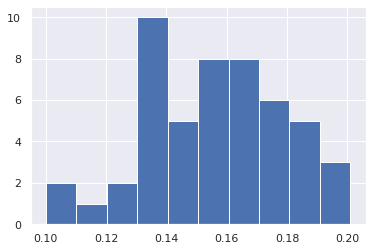

In [0]:
import numpy as np
from vega_datasets import data

d_obesity = data.obesity()
d_rate = np.array(d_obesity['rate'])

import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot styles
plt.hist(d_rate, 10);

In [0]:
import numpy as np
from vega_datasets import data

d_obesity = data.obesity()
d_rate = np.array(d_obesity['rate'])

print(np.sum((d_rate > 0.1) & (d_rate < 1.0)))
print(np.sum(~( (d_rate <= 0.1) | (d_rate >= 1) )))

print("Number states without obesity: ", np.sum(d_rate == 0))
print("Number states with obesity: ", np.sum(d_rate != 0))
print("States with more than 0.15 obesity rate:", np.sum(d_rate > 0.15))
print("States with < 0.15 obesity rate:", np.sum((d_rate > 0) & (d_rate < 0.15)))

49
49
Number states without obesity:  0
Number states with obesity:  50
States with more than 0.15 obesity rate: 30
States with < 0.15 obesity rate: 20


#Example: What Is the Average Weight of US Cars?

In [0]:
import numpy as np
from vega_datasets import data
data.list_datasets()

In [0]:
d_cars = data.cars()
d_cars.head()

In [0]:
d_weights = np.array(d_cars['Weight_in_lbs'])
print(d_weights)

In [0]:
print("Mean weight: ", d_weights.mean())
print("Standard deviation:", d_weights.std())
print("Minimum weight: ", d_weights.min())
print("Maximum weight: ", d_weights.max())

In [0]:
print("25th percentile: ", np.percentile(d_weights, 25))
print("Median: ", np.median(d_weights))
print("75th percentile: ", np.percentile(d_weights, 75))

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot style
plt.hist(d_weights)
plt.title('Weight Distribution of US Cars')
plt.xlabel('weight (lbs)')
plt.ylabel('number');

In [0]:
import numpy as np
from vega_datasets import data

d_cars = data.cars()
d_cars.head()
d_weights = np.array(d_cars['Weight_in_lbs'])
d_cylinders = np.array(d_cars['Cylinders'])
d_power = np.array(d_cars['Horsepower'])

d_heavy = (d_weights > 2500)
d_four_cylinders = (d_cylinders == 4)

# Nan values are present! Use special form of median and max
print("Median power of heavy cars (horsepower): ",
 np.nanmedian(d_power[d_heavy]))
print("Median power of four-cylinder cars (horsepower): ",
 np.nanmedian(d_power[d_four_cylinders]))
print("Maximum power of heavy cars (horsepower): ",
 np.nanmax(d_power[d_heavy]))
print("Median power of non-heavy four-cylinder cars (horsepower):",
 np.nanmedian(d_power[d_four_cylinders & ~d_heavy]))

d_weights.shape

##Example: Selecting Random Points

In [0]:
mean = [0, 0]
cov = [[1, 2],
[2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plot styling
plt.scatter(X[:, 0], X[:, 1]);

In [0]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

In [0]:
selection = X[indices] # fancy indexing here
selection.shape

In [0]:
plt.scatter(X[:, 0], X[:, 1], alpha=1.0)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='red', s=200, alpha=0.2);

##Example: Binning Data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  del sys.path[0]


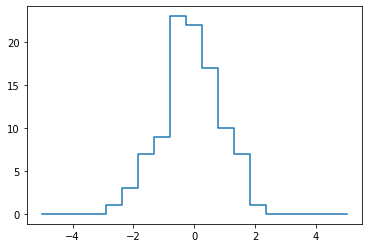

In [0]:
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.randn(100)
# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)
# find the appropriate bin for each x
i = np.searchsorted(bins, x)
# add 1 to each of these bins
np.add.at(counts, i, 1)
# plot the results
plt.plot(bins, counts, linestyle='steps');

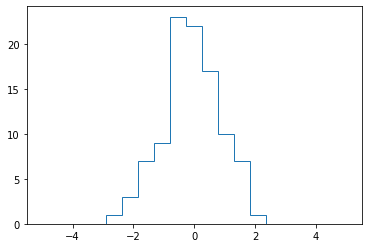

In [0]:
plt.hist(x, bins, histtype='step'); # standard way

In [0]:
# small size
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
The slowest run took 116.74 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 25 µs per loop
Custom routine:
The slowest run took 38.49 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 15.5 µs per loop


In [0]:
# large size
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
10 loops, best of 3: 82.7 ms per loop
Custom routine:
10 loops, best of 3: 123 ms per loop


#Example: K-nearest neighbours

In [0]:
import numpy as np
X = np.random.rand(30, 2)

def get_nearest(X, N):
  dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)
  nearest = np.argsort(dist_sq, axis=1)
  return X, X[nearest[:, :N]]


import plotly.graph_objects as go

fig = go.Figure()

def add_plot(fig, X, N):
  Xi, lst = get_nearest(X, N)
  xfit, yfit = [], []
  for (Xi, lst) in zip(*get_nearest(X, N+1)):
    for Xj in lst:
      xfit.append(Xi[0]); xfit.append(Xj[0]); xfit.append(None)
      yfit.append(Xi[1]); yfit.append(Xj[1]); yfit.append(None)

  fig.add_trace(go.Scatter(mode="lines+markers",
      visible=False, line=dict(color="#00CED1", width=3),
      name= str(N) + "-nearest neighbours", marker=dict(color="#000000"),
      x=xfit, y=yfit))
  
def make_steps(Nmax):
  steps = []
  for i in range(Nmax):
    step = dict(method="restyle",
    args=["visible", [False] * (Nmax + 1)],
    label=str(i))
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)
  return steps

Nmax = 10
for i in range(Nmax + 1):
  add_plot(fig, X, i)
fig.data[0].visible = True

sliders = [dict(active=0, currentvalue={"prefix": "Nearest neighbours: "}, pad={"t": 50}, steps=make_steps(Nmax+1))]
fig.update_layout(
    width=600, height=600,
    sliders=sliders,
    yaxis = {'range': [0.0, 1.0], 'autorange':False},
    xaxis = {'range': [0.0, 1.0], 'autorange':False}
)
fig.show()

#Example: numerical derivative

In [0]:
x = np.arange(3 * 4).reshape(3, 4)**2
dt0 = 1e-5
dt1 = 1e-5

print("Input x:")
print(x)

print("dx/dt0 (partial over axis=0):")
print((x[1:]-x[:-1]) / dt0)

print("dx/dt1 (partial over axis=1):")
print((x[:, 1:]-x[:, :-1]) / dt1)